<a href="https://colab.research.google.com/github/neetinds/Springboard/blob/master/16.3%20-%20Capstone_2_Pre_processing_and_Training_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Completion:
- Creating dummy features
- Scale standardization
- Split data into training and testing subsets

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import scipy
import pandas.util.testing as tm

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
filename = "salary.txt"
df = pd.read_csv("/content/gdrive/MyDrive/Springboard-master/16.3 - Capstone Two: Pre-processing & Training Data Development/salary.txt", delim_whitespace=True)

In [5]:
sns.set_style(style = 'whitegrid')

In [7]:
nrow, ncol = df.shape
nrow, ncol

(52, 6)

In [8]:
df.head(3)

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200


In [9]:
df.describe()

,yr,yd,sl
count,52.000000,52.000000,52.000000
mean,7.480769,16.115385,23797.653846
std,5.507536,10.222340,5917.289154
min,0.000000,1.000000,15000.000000
25%,3.000000,6.750000,18246.750000
50%,7.000000,15.500000,23719.000000
75%,11.000000,23.250000,27258.500000
max,25.000000,35.000000,38045.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sx      52 non-null     object
 1   rk      52 non-null     object
 2   yr      52 non-null     int64 
 3   dg      52 non-null     object
 4   yd      52 non-null     int64 
 5   sl      52 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.6+ KB


In [11]:
df['sl']  = df['sl'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sx      52 non-null     object
 1   rk      52 non-null     object
 2   yr      52 non-null     int64 
 3   dg      52 non-null     object
 4   yd      52 non-null     int64 
 5   sl      52 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.6+ KB


In [13]:
df.rename(columns={'sx': 'Sex', 'rk': 'Rank', 'yr': 'Years', 'dg': 'Degree', 'yd': 'YD', 'sl': 'Salary'}, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     52 non-null     object
 1   Rank    52 non-null     object
 2   Years   52 non-null     int64 
 3   Degree  52 non-null     object
 4   YD      52 non-null     int64 
 5   Salary  52 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.6+ KB


In [15]:
dataset = df[["Years", "Degree", "Salary"]]

In [16]:
dataset.head(3)

,Years,Degree,Salary
0,25,doctorate,36350
1,13,doctorate,35350
2,10,doctorate,28200


## Split the dataset into Independent(X) and Dependent(y) Variables

In [17]:
x = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, -1].values

In [18]:
x

array([[25],
       [13],
       [10],
       [ 7],
       [19],
       [16],
       [ 0],
       [16],
       [13],
       [13],
       [12],
       [15],
       [ 9],
       [ 9],
       [ 9],
       [ 7],
       [13],
       [11],
       [10],
       [ 6],
       [16],
       [ 8],
       [ 7],
       [ 8],
       [ 9],
       [ 5],
       [11],
       [ 5],
       [ 3],
       [ 3],
       [10],
       [11],
       [ 9],
       [ 4],
       [ 6],
       [ 1],
       [ 8],
       [ 4],
       [ 4],
       [ 4],
       [ 3],
       [ 3],
       [ 0],
       [ 3],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 1],
       [ 1],
       [ 1],
       [ 0]])

In [19]:
y

array([36350, 35350, 28200, 26775, 33696, 28516, 24900, 31909, 31850,
       32850, 27025, 24750, 28200, 23712, 25748, 29342, 31114, 24742,
       22906, 24450, 19175, 20525, 27959, 38045, 24832, 25400, 24800,
       25500, 26182, 23725, 21600, 23300, 23713, 20690, 22450, 20850,
       18304, 17095, 16700, 17600, 18075, 18000, 20999, 17250, 16500,
       16094, 16150, 15350, 16244, 16686, 15000, 20300])

## Divide the complete dataset into training and testing data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Implement Classifier based on Simple Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
predictions = model.predict(X_test)
predictions

array([20520.22025604, 21304.14080179, 29927.266805  , 22871.98189328,
       26007.66407626, 26007.66407626, 20520.22025604, 25223.74353052,
       26791.58462201, 33062.94898798, 27575.50516776])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


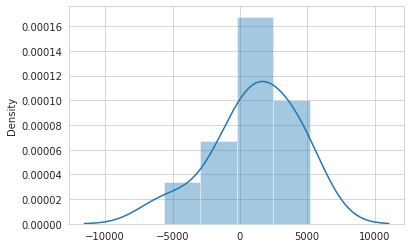

In [23]:
sns.distplot(predictions-y_test)

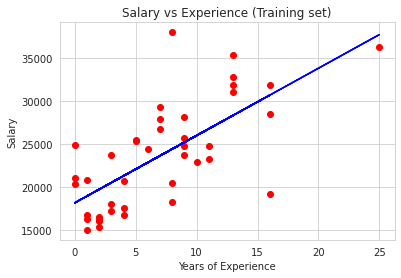

In [24]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

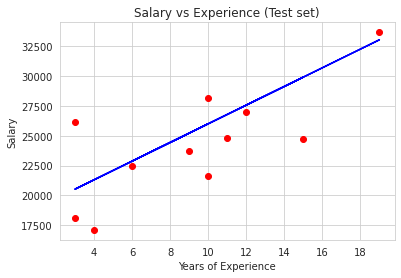

In [25]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Standardize the magnitude of numeric features using a scaler

In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
Xs = sc_X.fit_transform(X_test)
Ys = np.squeeze(sc_Y.fit_transform(y_test.reshape(-1, 1)))

In [27]:
models = LinearRegression()
models.fit(Xs, Ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
predictionss = models.predict(Xs)
predictionss

array([-0.96331288, -0.80974126,  0.87954655, -0.50259803,  0.11168845,
        0.11168845, -0.96331288, -0.04188317,  0.26526007,  1.49383302,
        0.41883169])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


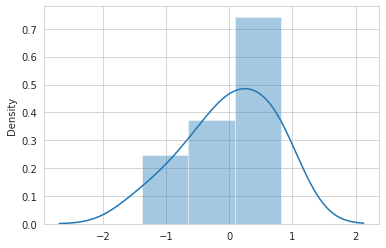

In [29]:
sns.distplot(predictionss-Ys)

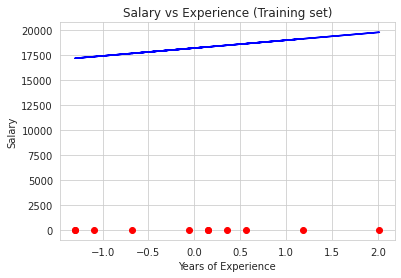

In [31]:
plt.scatter(Xs, Ys, color = 'red')
plt.plot(Xs, model.predict(Xs), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Convert categorical data, sex, into dummy or indicator variables

In [32]:
sex_dummies = pd.get_dummies(df.Sex, prefix='Sex') 
df = pd.concat([df, sex_dummies], axis = 1)

In [33]:
df

,Sex,Rank,Years,Degree,YD,Salary,Sex_female,Sex_male
0,male,full,25,doctorate,35,36350,0,1
1,male,full,13,doctorate,22,35350,0,1
2,male,full,10,doctorate,23,28200,0,1
3,female,full,7,doctorate,27,26775,1,0
4,male,full,19,masters,30,33696,0,1
5,male,full,16,doctorate,21,28516,0,1
6,female,full,0,masters,32,24900,1,0
7,male,full,16,doctorate,18,31909,0,1
8,male,full,13,masters,30,31850,0,1
9,male,full,13,masters,31,32850,0,1


In [34]:
degree_dummies = pd.get_dummies(df.Degree, prefix='Degree', drop_first=True) 
df = pd.concat([df, degree_dummies], axis = 1)
df.head()

,Sex,Rank,Years,Degree,YD,Salary,Sex_female,Sex_male,Degree_masters
0,male,full,25,doctorate,35,36350,0,1,0
1,male,full,13,doctorate,22,35350,0,1,0
2,male,full,10,doctorate,23,28200,0,1,0
3,female,full,7,doctorate,27,26775,1,0,0
4,male,full,19,masters,30,33696,0,1,1


In [35]:
rank_dummies = pd.get_dummies(df.Rank, prefix='Rank') 
df = pd.concat([df, rank_dummies], axis = 1)
df.head()

,Sex,Rank,Years,Degree,YD,Salary,Sex_female,Sex_male,Degree_masters,Rank_assistant,Rank_associate,Rank_full
0,male,full,25,doctorate,35,36350,0,1,0,0,0,1
1,male,full,13,doctorate,22,35350,0,1,0,0,0,1
2,male,full,10,doctorate,23,28200,0,1,0,0,0,1
3,female,full,7,doctorate,27,26775,1,0,0,0,0,1
4,male,full,19,masters,30,33696,0,1,1,0,0,1


In [36]:
dataset_new = df.select_dtypes(include=['int', 'float'])
dataset_new.head()

,Years,YD,Salary
0,25,35,36350
1,13,22,35350
2,10,23,28200
3,7,27,26775
4,19,30,33696


In [37]:
df.head(3)

,Sex,Rank,Years,Degree,YD,Salary,Sex_female,Sex_male,Degree_masters,Rank_assistant,Rank_associate,Rank_full
0,male,full,25,doctorate,35,36350,0,1,0,0,0,1
1,male,full,13,doctorate,22,35350,0,1,0,0,0,1
2,male,full,10,doctorate,23,28200,0,1,0,0,0,1


In [38]:
df.to_csv("salary_dummies.csv")

In [40]:
df.head(3)

,Sex,Rank,Years,Degree,YD,Salary,Sex_female,Sex_male,Degree_masters,Rank_assistant,Rank_associate,Rank_full
0,male,full,25,doctorate,35,36350,0,1,0,0,0,1
1,male,full,13,doctorate,22,35350,0,1,0,0,0,1
2,male,full,10,doctorate,23,28200,0,1,0,0,0,1


In [41]:
data = df[["Years", "Salary", "Sex_female", "Sex_male", "Degree_masters", "Rank_assistant", "Rank_associate", "Rank_full"]]

In [42]:
# split into inputs and outputs
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [43]:
print(X.shape, y.shape)

(52, 7) (52,)


In [44]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34, 7) (18, 7) (34,) (18,)


In [45]:
from sklearn.ensemble import RandomForestRegressor
# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [46]:
# make predictions
yhat = model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


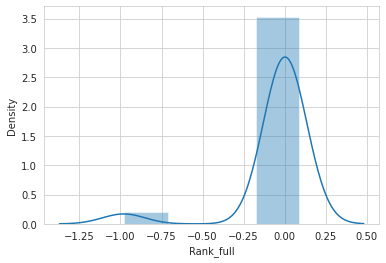

In [47]:
sns.distplot(yhat-y_test)